# Importing Libaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# opening DataSet

In [ ]:
dataset = pd.read_csv('Live.csv')

# Drop unnecessary columns
dataset = dataset.drop(columns=['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'])


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'status_type' column
label_encoder = LabelEncoder()
dataset['status_type'] = label_encoder.fit_transform(dataset['status_type'])

# Check for missing values
print(dataset.isna().any())

status_type      False
num_reactions    False
num_comments     False
num_shares       False
num_likes        False
num_loves        False
num_wows         False
num_hahas        False
num_sads         False
num_angrys       False
dtype: bool


# Seperate features and target variable

In [ ]:
# Separate features and target variable
X = dataset.drop(columns=['status_type'])
y = dataset['status_type']


# Standardize the features

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Perform K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

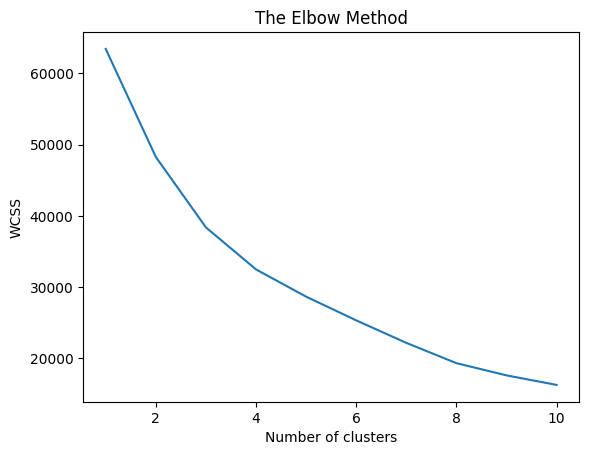

In [ ]:

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Applying K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


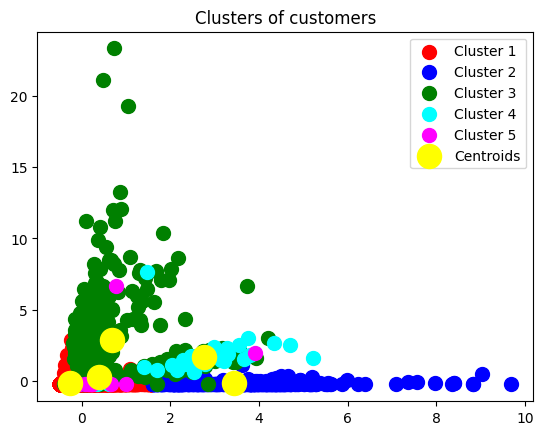

In [ ]:
# Applying K-means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.scatter(X_scaled[y_kmeans == 0][:, 0], X_scaled[y_kmeans == 0][:, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1][:, 0], X_scaled[y_kmeans == 1][:, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2][:, 0], X_scaled[y_kmeans == 2][:, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3][:, 0], X_scaled[y_kmeans == 3][:, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4][:, 0], X_scaled[y_kmeans == 4][:, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

# Finding Majority Status_Type from status

In [ ]:

# Assign cluster labels to the original DataFrame
dataset['k-cluster'] = kmeans.labels_

# Inverse transform status_type for each cluster
cluster_majority = {}
for cluster in range(kmeans.n_clusters):
    cluster_data = dataset[dataset['k-cluster'] == cluster]
    majority_status_type = cluster_data['status_type'].mode()[0]  # Get mode (most frequent) status_type
    majority_status_type = label_encoder.inverse_transform([majority_status_type])[0]  # Convert back to original label
    cluster_majority[cluster] = majority_status_type

# Display majority status_type for each cluster
for cluster, majority_status_type in cluster_majority.items():
    print(f"Cluster {cluster}: Majority Status Type - {majority_status_type}")


Cluster 0: Majority Status Type - photo
Cluster 1: Majority Status Type - photo
Cluster 2: Majority Status Type - video
Cluster 3: Majority Status Type - video
Cluster 4: Majority Status Type - photo


#Hierarchical Clustering

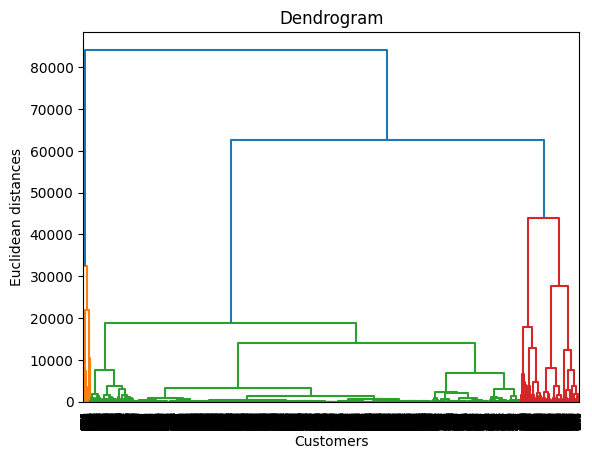

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Performing Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Ploting Clusters

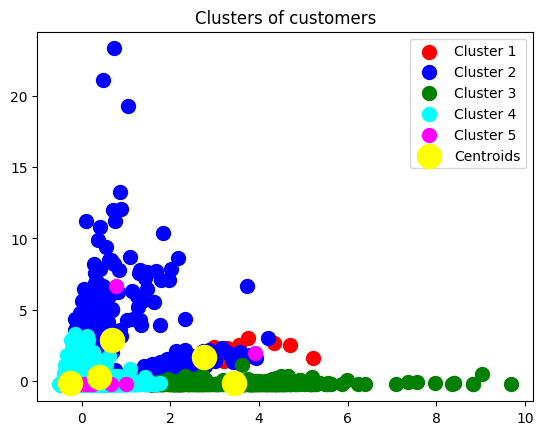

In [ ]:

plt.scatter(X_scaled[y_hc == 0][:, 0], X_scaled[y_hc == 0][:, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1][:, 0], X_scaled[y_hc == 1][:, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2][:, 0], X_scaled[y_hc == 2][:, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_hc == 3][:, 0], X_scaled[y_hc == 3][:, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_hc == 4][:, 0], X_scaled[y_hc == 4][:, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

# Finding Majority Status_Type from status

In [ ]:
dataset['h-cluster'] = hc.labels_
cluster_majority = {}
for cluster in range(hc.n_clusters):
    cluster_data = dataset[dataset['h-cluster'] == cluster]
    majority_status_type = cluster_data['status_type'].mode()[0]  # Get mode (most frequent) status_type
    majority_status_type = label_encoder.inverse_transform([majority_status_type])[0]  # Convert back to original label
    cluster_majority[cluster] = majority_status_type

# Display majority status_type for each cluster
for cluster, majority_status_type in cluster_majority.items():
    print(f"Cluster {cluster}: Majority Status Type - {majority_status_type}")


Cluster 0: Majority Status Type - video
Cluster 1: Majority Status Type - video
Cluster 2: Majority Status Type - photo
Cluster 3: Majority Status Type - photo
Cluster 4: Majority Status Type - photo


# Conclusion

Clustering techniques likes Hierarchical Clustering and k-mean Clustering has been implemented